### 영화 평점 분석
- 영화 평점정보를 크롤링하여 평점의 변화에 대한 시각화 분석 진행
    - 영화 평점 정보 크롤링
    -정형데이터로 정리

In [1]:
pip install BeautifulSoup4

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\sju02\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [2]:
#필요 패키지 import
from urllib.request import urlopen
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
from urllib.parse import urljoin,quote #url 두개 연결시켜주는 함수
import urllib

# from tqdm import tqdm_notebook #여러 페이지 크롤링할때 진행 정보 보여주는 패키지

https://movie.naver.com/movie/sdb/rank/rmovie.naver?sel=cnt&tg=0&date=20220726
https://movie.naver.com/movie/sdb/rank/rmovie.naver?sel=cnt&tg=0&date=20220725

#### 1.URL 생성

In [3]:
#마지막 슬러쉬 겹치게 됌
url_base = 'https://movie.naver.com/' #맨 앞 슬러쉬 두개는  규칙, 중간에 두개는 있어서는 안 됌
url_sub='movie/sdb/rank/rmovie.naver?sel=cur&date=20220725' #sel에 조회순=cnt / 평점순(현재상형영화)=cur / 평점순(모든영화)=pnt
url=url_base+url_sub
url

'https://movie.naver.com/movie/sdb/rank/rmovie.naver?sel=cur&date=20220725'

In [4]:
#두개의 url을 결합해 주는 함수 -url 형식을 체크
url=urljoin(url_base,url_sub)
url

'https://movie.naver.com/movie/sdb/rank/rmovie.naver?sel=cur&date=20220725'

#### 2.페이지 요청/파싱객체 생성

In [5]:
#페이지 요청
html=urlopen(url)
#파싱객체 생성
soup=BeautifulSoup(html, 'html.parser')

In [6]:
soup


<!DOCTYPE html>

<html lang="ko">
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="http://imgmovie.naver.com/today/naverme/naverme_profile.jpg" property="me2:image">
<meta content="네이버영화 " property="me2:post_tag">
<meta content="네이버영화" property="me2:category1"/>
<meta content="" property="me2:category2"/>
<meta content="랭킹 : 네이버 영화" property="og:title"/>
<meta content="영화, 영화인, 예매, 박스오피스 랭킹 정보 제공" property="og:description"/>
<meta content="article" property="og:type"/>
<meta content="https://movie.naver.com/movie/sdb/rank/rmovie.naver?sel=cur&amp;date=20220725" property="og:url"/>
<meta content="http://static.naver.net/m/movie/icons/OG_270_270.png" property="og:image"/><!-- http://static.naver.net/m/movie/im/navermovie.jpg -->
<meta content="http://imgmovie.naver.com/today/naverme/naverme_profile.jpg" property="og:article:thumbnailUrl"/>
<meta content="네이버 영화" property="og:article:author"/

#### 3.현재 랭킹 영화 제목이 들어있는 태그 가져오기

In [7]:
soup.findAll('div',{'class','tit5'})

[<div class="tit5">
 <a href="/movie/bi/mi/basic.naver?code=81888" title="탑건: 매버릭">탑건: 매버릭</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.naver?code=217719" title="명탐정 코난: 할로윈의 신부">명탐정 코난: 할로윈의 신부</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.naver?code=192608" title="범죄도시2">범죄도시2</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.naver?code=213733" title="극장판 주술회전 0">극장판 주술회전 0</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.naver?code=201073" title="코다">코다</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.naver?code=213504" title="위대한 침묵">위대한 침묵</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.naver?code=208772" title="카시오페아">카시오페아</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.naver?code=36944" title="올드보이">올드보이</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.naver?code=10128" title="디어 헌터">디어 헌터</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.naver?code=217472

#### 4.제목 추출하기

In [8]:
len(soup.findAll('div',{'class','tit5'}))

# # 방법1
soup.findAll('div',{'class','tit5'})[0].text #'\n탑건: 매버릭\n'
soup.findAll('div',{'class','tit5'})[0].text.replace('\n',"") #'탑건: 매버릭'

#방법 2. 모든 제목은 'title=' 뒤에 따라오니 아래의 코드도 사용 가능, replace로 변환 안해도 됌
soup.find_all('div', class_='tit5')[0].a['title']

#방법 3. a.strinf 사용
soup.find_all('div', class_='tit5')[0].a.string



'탑건: 매버릭'

In [9]:
#tag 객체의 내부 태그 접근시. 연산자 사용가능
soup.findAll('div',{'class','tit5'})[0]

# <div class="tit5">
# <a href="/movie/bi/mi/basic.naver?code=81888" title="탑건: 매버릭">탑건: 매버릭</a>
# </div>

soup.findAll('div',{'class','tit5'})[0].a['href'] #title 추출했던것처럼
soup.findAll('div',{'class','tit5'})[0].atext

# '/movie/bi/mi/basic.naver?code=81888'

#### 4.제목 반복 추출하기

In [10]:
#내포 for 문을 활용한 영화 타이틀 추출
#<반복 실행문> for <반복변수> in <반복범위>]    -이때 콜론(:) 사용하지 않음
movie_name = [s.a.text for s in soup.findAll('div',{'class','tit5'})]
#그냥 for s in 하면 오류
#s for s는 태그전체 추출
#s.a.text로 text만 추출
movie_name

['탑건: 매버릭',
 '명탐정 코난: 할로윈의 신부',
 '범죄도시2',
 '극장판 주술회전 0',
 '코다',
 '위대한 침묵',
 '카시오페아',
 '올드보이',
 '디어 헌터',
 '엘비스',
 '펄프 픽션',
 '헤어질 결심',
 '그레이 맨',
 '큐어',
 '신은 죽지 않았다 3: 어둠 속의 빛',
 '더 킬러: 죽어도 되는 아이',
 '인사이드 르윈',
 '우연과 상상',
 '애프터 양',
 '미니언즈2',
 '홀리 모터스',
 '외계+인 1부',
 '닥터 스트레인지: 대혼돈의 멀티버스',
 '그대가 조국',
 '마녀(魔女) Part2. The Other One',
 '토르: 러브 앤 썬더',
 '박쥐',
 '브로커']

#### 5.특정일의 영화 평점 추출


In [11]:
soup.findAll('td',{'class':'point'})

[<td class="point">9.78</td>,
 <td class="point">9.52</td>,
 <td class="point">9.40</td>,
 <td class="point">9.24</td>,
 <td class="point">9.12</td>,
 <td class="point">9.09</td>,
 <td class="point">9.06</td>,
 <td class="point">9.04</td>,
 <td class="point">8.92</td>,
 <td class="point">8.86</td>,
 <td class="point">8.77</td>,
 <td class="point">8.64</td>,
 <td class="point">8.48</td>,
 <td class="point">8.33</td>,
 <td class="point">8.32</td>,
 <td class="point">8.21</td>,
 <td class="point">8.16</td>,
 <td class="point">8.15</td>,
 <td class="point">8.14</td>,
 <td class="point">7.93</td>,
 <td class="point">7.46</td>,
 <td class="point">7.30</td>,
 <td class="point">7.27</td>,
 <td class="point">7.09</td>,
 <td class="point">6.66</td>,
 <td class="point">6.56</td>,
 <td class="point">6.33</td>,
 <td class="point">5.52</td>]

In [12]:
len(soup.findAll('td',{'class':'point'}))

28

In [13]:
soup.findAll('td',{'class':'point'})[0].text

'9.78'

In [14]:
movie_point=[s.text for s in soup.findAll('td',{'class':'point'})]
movie_point

['9.78',
 '9.52',
 '9.40',
 '9.24',
 '9.12',
 '9.09',
 '9.06',
 '9.04',
 '8.92',
 '8.86',
 '8.77',
 '8.64',
 '8.48',
 '8.33',
 '8.32',
 '8.21',
 '8.16',
 '8.15',
 '8.14',
 '7.93',
 '7.46',
 '7.30',
 '7.27',
 '7.09',
 '6.66',
 '6.56',
 '6.33',
 '5.52']

In [15]:
#영화 이름과 평점코드 결합
#url 생성
url_base = 'https://movie.naver.com/'
url_sub = '/movie/sdb/rank/rmovie.nhn?sel=cur&date=20210324'  ## 네이버 영화랭킹 평점순
url=urljoin(url_base,url_sub)

#페이지 요청
html=urlopen(url)

#파서 생성
soup = BeautifulSoup(html, "html.parser")

movie_name = [s.a.text for s in soup.find_all('div','tit5') ]
movie_point = [s.text for s in soup.find_all('td',{'class':'point'})]




#### 6.영화 정보를 수집할 기간 설정
- 기간 데이터 생성
- 위코드 함수로 구성 <br><br>
- 날짜 데이터 생성
- pd.date_range('시작일',periods= 생성날짜수, freq='D')

In [16]:
date=pd.date_range('20220101', periods=100, freq='D')
date

DatetimeIndex(['2022-01-01', '2022-01-02', '2022-01-03', '2022-01-04',
               '2022-01-05', '2022-01-06', '2022-01-07', '2022-01-08',
               '2022-01-09', '2022-01-10', '2022-01-11', '2022-01-12',
               '2022-01-13', '2022-01-14', '2022-01-15', '2022-01-16',
               '2022-01-17', '2022-01-18', '2022-01-19', '2022-01-20',
               '2022-01-21', '2022-01-22', '2022-01-23', '2022-01-24',
               '2022-01-25', '2022-01-26', '2022-01-27', '2022-01-28',
               '2022-01-29', '2022-01-30', '2022-01-31', '2022-02-01',
               '2022-02-02', '2022-02-03', '2022-02-04', '2022-02-05',
               '2022-02-06', '2022-02-07', '2022-02-08', '2022-02-09',
               '2022-02-10', '2022-02-11', '2022-02-12', '2022-02-13',
               '2022-02-14', '2022-02-15', '2022-02-16', '2022-02-17',
               '2022-02-18', '2022-02-19', '2022-02-20', '2022-02-21',
               '2022-02-22', '2022-02-23', '2022-02-24', '2022-02-25',
      

In [17]:
url_base = 'https://movie.naver.com/'
url_sub = '/movie/sdb/rank/rmovie.nhn?sel=cur&date={date}' #date 변수 붙이기
#문자열에 {변수명}을 사용하면 {}내부의 문자는 변수로 사용 됌

url=urljoin(url_base,url_sub)
url

'https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&date={date}'

In [18]:
today=date[17]
today.strftime('%Y%m%d')

'20220118'

In [19]:
#날짜 형식 변경,  quote는 문자열을 ascii 형식 문자열(%문자열)로 바꿔준다. 아스키가 아닌 글자도 url 인코딩 해줌
url.format(date=quote(today.strftime('%Y%m%d')))

'https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&date=20220118'

In [20]:
quote('강남역')

'%EA%B0%95%EB%82%A8%EC%97%AD'

In [21]:
for d in date[0:3] :
    today=d
    print(url.format(date=quote(today.strftime('%Y%m%d'))))


https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&date=20220101
https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&date=20220102
https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&date=20220103


#### 7.함수로 구성
-get_movie(date)  
    - date 인수를 사용해 url을 설정  
    - date 별로 영화정도(title, point)

In [22]:
def get_movie(date) :
    url_base='https://movie.naver.com/'
    url_sub ='/movie/sdb/rank/rmovie.nhn?sel=cur&date={date}'
    #문자열에 {변수명}을 사용하면 {}내부의 문자는 변수로 사용 됌

    url=urljoin(url_base,url_sub)

    today=date
    result = urlopen(url.format(date=quote(today.strftime('%Y%m%d'))))

    soup=BeautifulSoup(result)

    #랭킹 날짜 생성
    movie_date=today

    #영화 제목 추출
    movie_name=[s.a.text for s in soup.find_all('div','tit5')]

    #평저 추출
    movie_point=[s.text for s in soup.find_all('td',{'class':'point'})]

    #데이터프레임으로 반환
    return pd.DataFrame({'날짜':movie_date, "영화제목":movie_name, "영화평점":movie_point})



In [23]:
get_movie(date[17])

,날짜,영화제목,영화평점
0,2022-01-18,씽2게더,9.44
1,2022-01-18,코다,9.23
2,2022-01-18,러브레터,9.12
3,2022-01-18,스파이더맨: 노 웨이 홈,8.92
4,2022-01-18,기쿠지로의 여름,8.92
5,2022-01-18,아멜리에,8.81
6,2022-01-18,고양이를 부탁해,8.81
7,2022-01-18,돈 룩 업,8.69
8,2022-01-18,드라이브 마이 카,8.59
9,2022-01-18,특송,8.35


#### 8.설정 기간 영화 정보 추출


In [24]:
#설정 기간 영화 정보 추출
movie_df = pd.DataFrame() #빈데이터프레임 생성

#tqdm 사용해서 진행상태 확인 
for today in date :
    movie_df=pd.concat([movie_df, get_movie(today)], axis =0, ignore_index=True)

In [25]:
movie_df.shape

(2514, 3)

In [26]:
movie_df.head()
movie_df.tail()

,날짜,영화제목,영화평점
2509,2022-04-10,모비우스,7.24
2510,2022-04-10,앰뷸런스,7.19
2511,2022-04-10,스텔라,6.76
2512,2022-04-10,문폴,5.22
2513,2022-04-10,배니싱: 미제사건,4.33


In [27]:
movie_df.to_csv('./crawl_data/naver_movie_ranking.csv')

#### 9.시각화 작업
- 영화별 평점의 합을 계산(평점의 합이 높은 영화를 추출)
- 추출된 영화에 대해서 평점의 추이를 확인할 수 있는 그래프 작성


In [28]:
#데이터 특성 확인
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2514 entries, 0 to 2513
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      2514 non-null   datetime64[ns]
 1   영화제목    2514 non-null   object        
 2   영화평점    2514 non-null   object        
dtypes: datetime64[ns](1), object(2)
memory usage: 59.0+ KB


In [29]:
#평점의 합을 계산하려면 영화평점은 수치형이어야 함
#영화평점 항목의 datatype 변환 : astype(float)- 문자로 숫자로 바꾸는 numpy 함수
movie_df['영화평점']=movie_df['영화평점'].astype(float)
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2514 entries, 0 to 2513
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      2514 non-null   datetime64[ns]
 1   영화제목    2514 non-null   object        
 2   영화평점    2514 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 59.0+ KB


In [30]:
#영화별 point합 : pivot_table(data_set, index=[기준열],aggfunc=np.sum(집계함수))
movie_unique = pd.pivot_table(movie_df,index=['영화제목'],aggfunc=np.sum)
movie_unique.head()
movie_unique.tail()

,영화평점
영화제목,
해적: 도깨비 깃발,423.83
해피 뉴 이어,190.93
해피 투게더,220.48
화양연화,457.44
환상의 빛,104.00


In [31]:
#평점의 합이 높은 순으로 정렬
movie_top = movie_unique.sort_values(by='영화평점', ascending=False)
movie_top.head(50)

,영화평점
영화제목,
씽2게더,894.97
스파이더맨: 노 웨이 홈,887.49
드라이브 마이 카,812.60
코다,690.29
킹메이커,556.85
어나더 라운드,504.65
돈 룩 업,502.65
듄,485.56
하우스 오브 구찌,484.23


#### 10. 특정 영화만 추출해서 평점 변화 확인

In [33]:

tmp = movie_df.query('영화제목==["씽2게더"]')
tmp

,날짜,영화제목,영화평점
91,2022-01-06,씽2게더,9.41
110,2022-01-07,씽2게더,9.37
130,2022-01-08,씽2게더,9.40
150,2022-01-09,씽2게더,9.42
168,2022-01-10,씽2게더,9.40
...,...,...,...
2371,2022-04-06,씽2게더,9.41
2399,2022-04-07,씽2게더,9.40
2428,2022-04-08,씽2게더,9.40
2456,2022-04-09,씽2게더,9.40


#### 11. 평점 변화 그래프

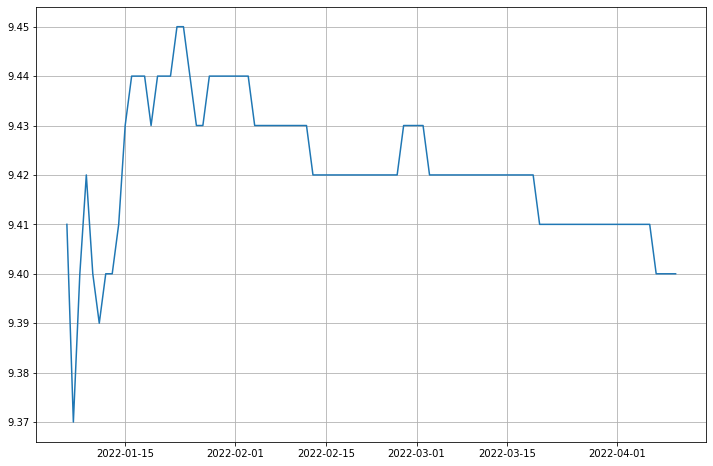

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12,8))
plt.plot(tmp['날짜'],tmp['영화평점'])
plt.grid()
plt.show()

#### 12.데이터 재배칙-피벗 사용(long-wide)

In [40]:
#날짜별 영화의 point 확인
movie_pivot=pd.pivot_table(movie_df,index=['날짜'], columns=['영화제목'],values=['영화평점'])

In [41]:
movie_pivot.head()

영화평점                                                                \
영화제목        355 가나의 혼인잔치: 언약 경관의 피 고양이를 부탁해 공각기동대 광대: 소리꾼  귀향 그녀에게 극장판 주술회전 0   
날짜                                                                              
2022-01-01  NaN          NaN   NaN     8.81  8.73     NaN NaN  NaN        NaN   
2022-01-02  NaN          NaN   NaN      NaN  8.73     NaN NaN  NaN        NaN   
2022-01-03  NaN          NaN   NaN     8.81  8.73     NaN NaN  NaN        NaN   
2022-01-04  NaN          NaN   NaN     8.81  8.73     NaN NaN  NaN        NaN   
2022-01-05  NaN          NaN  8.18     8.81  8.73     NaN NaN  NaN        NaN   

                     ...                                             \
영화제목       기쿠지로의 여름  ... 프렌치 디스패치 하나-비 하우스 오브 구찌 한공주 해리 포터와 불사조 기사단   
날짜                   ...                                              
2022-01-01      NaN  ...     8.02  NaN       NaN NaN            NaN   
2022-01-02      NaN  ...     8.02  NaN       NaN NaN            NaN   
2022-01-03      NaN  ...     8.01  NaN       NaN NaN            NaN   
2022-01-04      NaN  ...     8.01  NaN       NaN NaN            NaN   
2022-01-05      NaN  ...     8.01  NaN       NaN NaN            NaN   

                                                 
영화제목       해적: 도깨비 깃발 해피 뉴 이어 해피 투게더 화양연화 환상의 빛  
날짜                                               
2022-01-01        NaN    7.21    NaN  NaN   NaN  
2022-01-02        NaN    7.14    NaN  NaN   NaN  
2022-01-03        NaN    7.11    NaN  NaN   NaN  
2022-01-04        NaN    7.08    NaN  NaN   NaN  
2022-01-05        NaN    7.10    NaN  NaN   NaN  

[5 rows x 95 columns]

In [42]:
#피벗테이블 구성중에 멀티 인덱스로 구성되었음
#최상위 인덱스(영화 평점) - 멀티인덱스 제거
# df.columns.droplevel()

movie_pivot.columns = movie_pivot.columns.droplevel()

In [43]:
movie_pivot.head()

영화제목,355,가나의 혼인잔치: 언약,경관의 피,고양이를 부탁해,공각기동대,광대: 소리꾼,귀향,그녀에게,극장판 주술회전 0,기쿠지로의 여름,...,프렌치 디스패치,하나-비,하우스 오브 구찌,한공주,해리 포터와 불사조 기사단,해적: 도깨비 깃발,해피 뉴 이어,해피 투게더,화양연화,환상의 빛
날짜,,,,,,,,,,,,,,,,,,,,,
2022-01-01,NaN,NaN,NaN,8.81,8.73,NaN,NaN,NaN,NaN,NaN,...,8.02,NaN,NaN,NaN,NaN,NaN,7.21,NaN,NaN,NaN
2022-01-02,NaN,NaN,NaN,NaN,8.73,NaN,NaN,NaN,NaN,NaN,...,8.02,NaN,NaN,NaN,NaN,NaN,7.14,NaN,NaN,NaN
2022-01-03,NaN,NaN,NaN,8.81,8.73,NaN,NaN,NaN,NaN,NaN,...,8.01,NaN,NaN,NaN,NaN,NaN,7.11,NaN,NaN,NaN
2022-01-04,NaN,NaN,NaN,8.81,8.73,NaN,NaN,NaN,NaN,NaN,...,8.01,NaN,NaN,NaN,NaN,NaN,7.08,NaN,NaN,NaN
2022-01-05,NaN,NaN,8.18,8.81,8.73,NaN,NaN,NaN,NaN,NaN,...,8.01,NaN,NaN,NaN,NaN,NaN,7.10,NaN,NaN,NaN


In [45]:
movie_top.head(5)

,영화평점
영화제목,
씽2게더,894.97
스파이더맨: 노 웨이 홈,887.49
드라이브 마이 카,812.60
코다,690.29
킹메이커,556.85


In [47]:
sel_col=movie_top.head(5).index
sel_col

Index(['씽2게더', '스파이더맨: 노 웨이 홈', '드라이브 마이 카', '코다', '킹메이커'], dtype='object', name='영화제목')

In [48]:
## 그래프 한글 처리하는 코드
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows': 
    # 윈도우   
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

In [49]:
movie_pivot[sel_col]

영화제목,씽2게더,스파이더맨: 노 웨이 홈,드라이브 마이 카,코다,킹메이커
날짜,,,,,
2022-01-01,NaN,8.97,NaN,9.24,NaN
2022-01-02,NaN,8.96,NaN,9.24,NaN
2022-01-03,NaN,8.95,NaN,9.24,NaN
2022-01-04,NaN,8.95,NaN,9.23,NaN
2022-01-05,NaN,8.95,NaN,9.23,NaN
...,...,...,...,...,...
2022-04-06,9.41,8.82,8.44,9.15,7.28
2022-04-07,9.40,8.82,8.44,9.15,7.28
2022-04-08,9.40,8.82,8.44,9.14,7.28


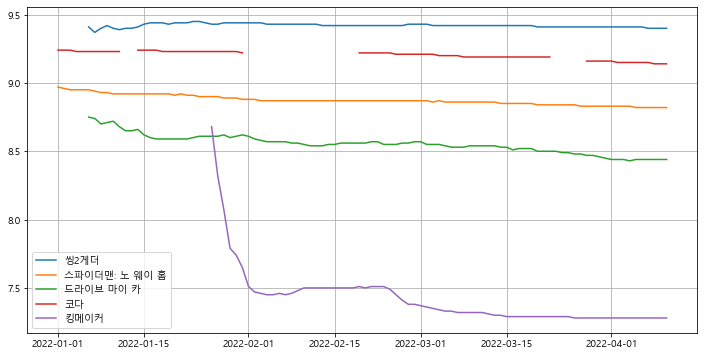

In [50]:
plt.figure(figsize=(12,6))
plt.plot(movie_pivot[sel_col])
plt.legend(sel_col,loc='best') #적절한 공간이고 가운데 위치
plt.grid()
plt.show()